In [1]:
import numpy as np
import torch
from PIL import Image
import pandas as pd
import os
torch.manual_seed(0)

In [104]:
import matplotlib.pyplot as plt

In [8]:
from glob import glob

In [4]:
# import zipfile

In [5]:
# with zipfile.ZipFile("/scratch/scratch6/akansh12/DeepEXrays/data/data_256/Vin_big_dataCXR.zip", 'r') as zip_ref:
#     zip_ref.extractall("/scratch/scratch6/akansh12/DeepEXrays/data/data_256/")

In [64]:
orig_ann = pd.read_csv("/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/annotations/annotations_train.csv")
orig_ann.iloc[:,2] = 1*(orig_ann['class_name'] != 'No finding').values
A = orig_ann.groupby('image_id').sum()
A['class_name'] = 1* (A['class_name'] > 0).values
A = A.drop(['x_min','y_min','x_max','y_max'], axis = 1)
A.to_csv("/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Data/Processed/normalvsAbbnormal.csv")
ann = pd.read_csv("/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Data/Processed/normalvsAbbnormal.csv")

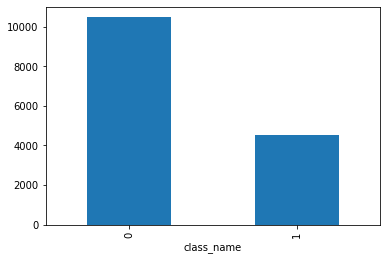

In [110]:
ann.groupby(['class_name']).count().plot(kind = 'bar', legend = False)

In [111]:
ann.groupby(['class_name']).count()

,image_id
class_name,
0,10478
1,4522


#### Visualization of the images

In [125]:
images_path = "/scratch/scratch6/akansh12/DeepEXrays/data/data_256/train/"

In [123]:
ann[ann.class_name == 1].reset_index(drop = True)['image_id'].values[0]

'0005e8e3701dfb1dd93d53e2ff537b6e'

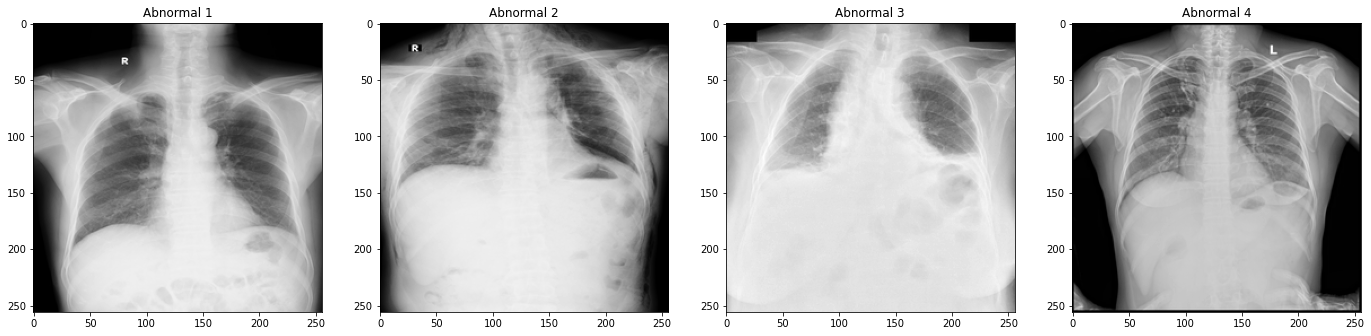

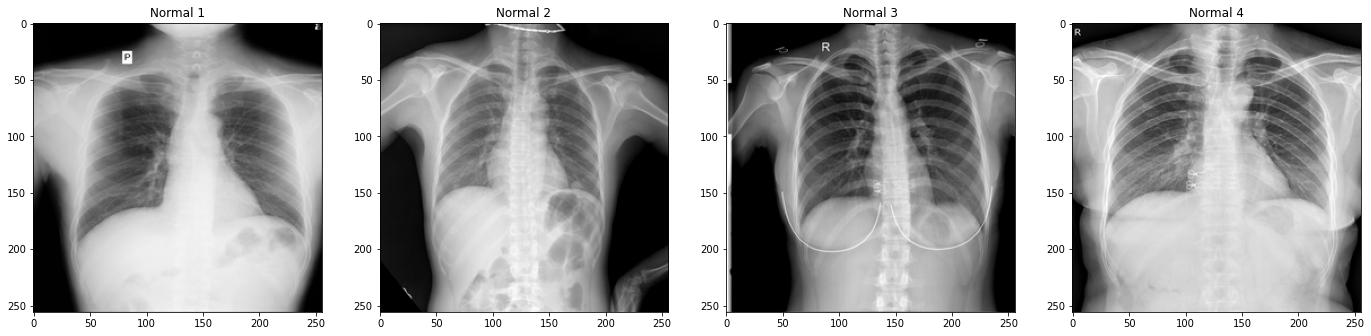

In [129]:
plt.figure(figsize=(30,30)) 
for i in range(1,5):
    plt.subplot(1,5,i,)
    plt.imshow(plt.imread((os.path.join(images_path, ann[ann.class_name == 1].reset_index(drop = True)['image_id'].values[i]+".png"))), cmap = 'gray')
    plt.title(f"Abnormal {i}")
plt.figure(figsize=(30,30)) 
for i in range(1,5):
    plt.subplot(1,5,i,)
    plt.imshow(plt.imread((os.path.join(images_path, ann[ann.class_name == 0].reset_index(drop = True)['image_id'].values[i]+".png"))), cmap = 'gray')
    plt.title(f"Normal {i}")

In [ ]:
class vindata(Dataset):
    def __init__(self, data_dir, transform, datatype = "train"):
        path2data
    